In [ ]:
## Set up
# Imports

import numpy as np
import matplotlib.pyplot as plt

#@title Figure settings
import ipywidgets as widgets       # interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")



# @title Plotting functions
def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF', length_includes_head = True, zorder = 2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08, color='#DC267F', length_includes_head = True, zorder = 3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr], [r"Vector $\mathbf{v}$", r"Normalized vector $\tilde{\mathbf{v}}$"], handlelength = 0, fontsize = 20, loc = 'upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# **1. Normalizing vectors**

- Dimentionality of a vector:  
The number of componenets in the ordered list. For example  
$\mathbf{x} = \begin{bmatrix}
3 \\
4 \\
3 \\ 
\end{bmatrix}$
is a 3 dimentional vector. When we want to refer to componenet by $\mathbf{x}_i$, where i indicates the position of the componenet. In this vector, $\mathbf{x_1} = 3$ 
- The length of a vector:  
is one of defining property of a vector, notation as $||\mathbf{x}||$. The length of the vector can be caculated as the square root of the sum of all components squared: 

$$||\mathbf{x}|| = \sqrt{\sum_{i=1}^N \mathbf{x}_i^2} $$

- Two special types of vectors:
   - Zero vectors: have length of 0 (all components equal 0)
   - Unit vectors: have length of 1. We can normalize a vector and creat a unit vector ($\tilde{\mathbf{x}}$), by dividing by its length ($||\mathbf{x}||$ ): 
   $$\tilde{\mathbf{x}} = \frac{\mathbf{x}}{||\mathbf{x}||} $$






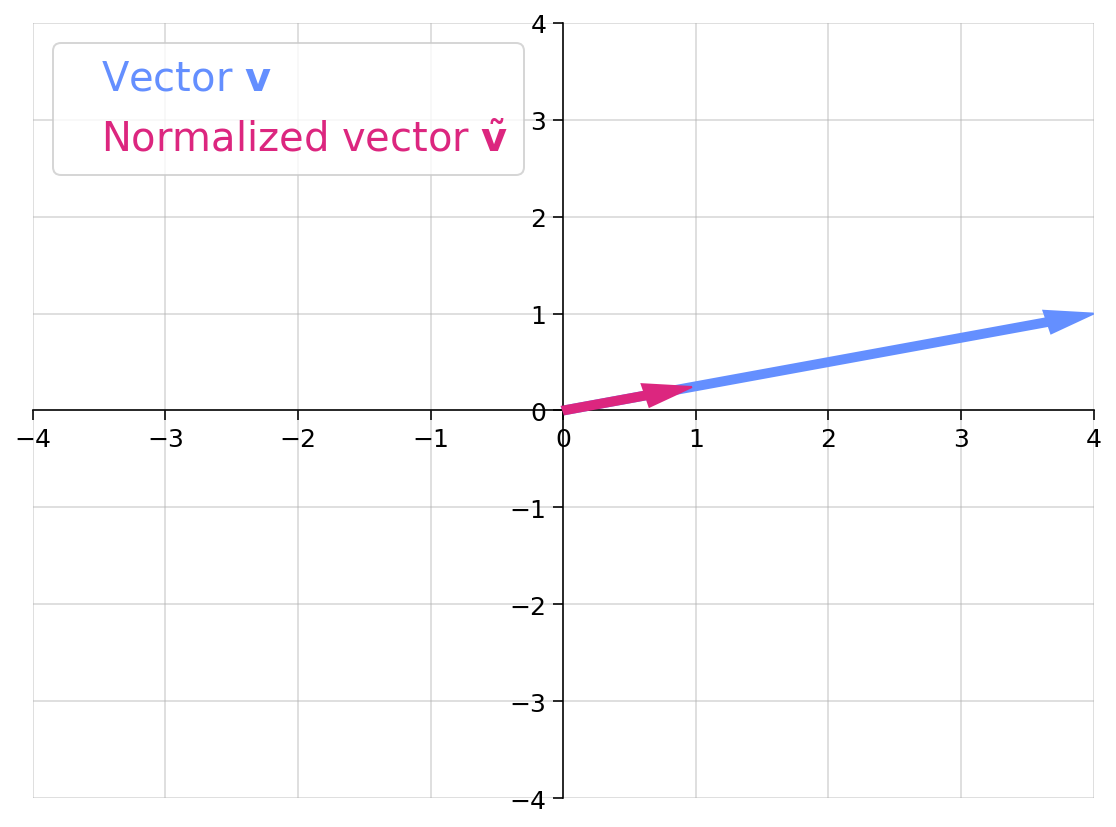

In [ ]:
def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """
  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector/vector_length

  return normalized_vector

# Create vector v from above (use np.array)
v = np.array([4,1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors
visualize_vectors(v, v_unit)

What is `np.linalg.norm`: is used to caculate one of the eight different matri norms/ one of the vector norms

[educative.io](https://www.educative.io/edpresso/what-is-the-nplinalgnorm-method-in-numpy)

[hadrienj: DL book, good example](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/)

# **2. Linear combinations of vectors**

- Scalar mutiplication:  a vector changes its length but not its direction. When we mutiply a vector, $\mathbf{x}$, by a scale, $a$, we mutiply each individual compinenet by the scalar.   

$$ a\mathbf{x} = \begin{bmatrix}
    a\mathbf{x}_1 \\ a\mathbf{x}_2 \\ \vdots \\ a\mathbf{x}_N
\end{bmatrix}$$
 
- Vector addtion:
We can visulaize it as the stacking of the two arrows head to tail.

 $$\mathbf{x} + \mathbf{y} = \begin{bmatrix}
           \mathbf{x}_{1} + \mathbf{y}_1 \\ \mathbf{x}_{2} + \mathbf{y}_2\\ \vdots \\ \mathbf{x}_{N} + \mathbf{y}_N 
\end{bmatrix}$$


- Linear combination:   
When there is a group of 2 or more vectors, we call it as a **set of vectors**.  **Linear combination** of a set of vectors is a combination of the set using saclar mutiplication and vector addition. In other words, we mutiply each vector in the set by a scalar and then adding all the scalr mutoplied vectors toegther. The output of this new vector is a linear combination of th set. In formmaly defined, a vector, $\mathbf{u}$, is a linear combination of a set of vectors $\mathbf{v}^1, \mathbf{v}^2, ..., \mathbf{v}^N$ with (scalar) weights $c_1, c_2, ...c_N$ if:

$$\mathbf{u} = c_1\mathbf{v}^1 + c_2\mathbf{v}^2 + ... + c_n\mathbf{v}^N $$.


In [ ]:
 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

# **3. Space through vectors: Span and Linear independence**

What is the **span of a set of vectors**? It is a set of all possible linear combination of the vectors. In the previous  code, the vector $\mathbf{x}$ and $\mathbf{y}$ spanned 2D space (${\rm I\!R}^2$)- you can get to any point in 2D space with some combination of $a$ and $b$, the scalar multiples in a linear combination of $\mathbf{x}$ and $\mathbf{y}$:

$$\mathbf{v} = a\mathbf{x} + b\mathbf{y}$$

In other words, each point in 2D space is identified by a unique and single combination of $a$ and $b$: if you know the point, you know what $a$ and $b$ are. 

- A set of vector is:
  - **Linearly dependent**:  if one can be written as linear combination of others ( can remove one and have the same span).  
  - **Linearly independent**: if it is not the case for linearly depedent, then the set of vectors is linearly independent.

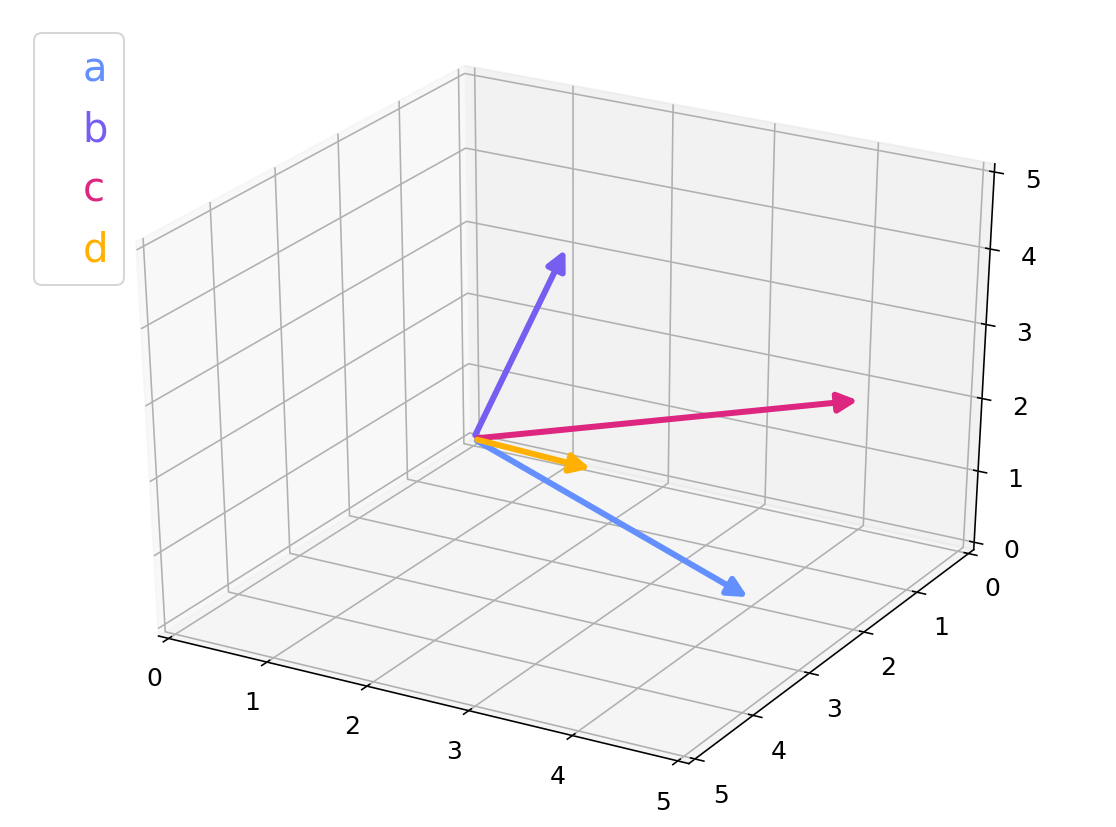

In [ ]:
# @markdown Execute this cell to visualize vectors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = Arrow3D([0, 4], [0, 2],
                [0, 0], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#648FFF")

ax.add_artist(a)
b = Arrow3D([0, 1], [0, 0],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#785EF0")

ax.add_artist(b)
c = Arrow3D([0, 5], [0, 2],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#DC267F")

ax.add_artist(c)
d = Arrow3D([0, 3], [0, 3],
                [0, 2], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#FFB000")

ax.add_artist(d)

leg = ax.legend([a, b, c, d], ['a', 'b', 'c', 'd'], handlelength = 0, fontsize = 20, loc = 'upper left')
for handle, label in zip(leg.legendHandles, leg.texts):
  label.set_color(handle.get_facecolor())
  handle.set_visible(False)
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5]); #, xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');

a = [4, 2, 0] 
b = [1, 0, 3] 
c = [5, 2, 3]  
d = [3, 3, 2] 
- These vectors are linearly dependent as one can be formed as a linear combination of the others (a+b=c).
- The span of {a,b,c,d] is 3D space (R^3).
- The span of a and b are a 1D line through 3D space ( but it is not R^1).
- The span of a and b is a 2d plane through 3D space (note it is not R^2).

4. Basis of a space

The standard basis for (${\rm I\!R}^2$)